In [1]:
import numpy as np

In [2]:
X = np.random.rand(20,1) * 10 -5

In [3]:
y = np.sin(X)

In [4]:
X.shape,y.shape

((20, 1), (20, 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [6]:
import keras.backend as K

In [7]:
K.clear_session()
K.set_learning_phase(1)
model = Sequential()
model.add(Dense(1,input_dim = 1))
model.add(Dropout(0.05))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(1))

/opt/conda/lib/python3.7/site-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2023-01-22 01:05:48.185145: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
from tensorflow.keras.optimizers import SGD

In [9]:
model.compile(loss='mse',optimizer=SGD(lr=0.01))

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
model.fit(X,y,epochs=10000,batch_size=10,verbose=0)

2023-01-22 01:05:49.092559: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [11]:
X_test = np.arange(-10,10,0.1)
X_test = np.expand_dims(X_test,-1)

In [12]:
probs = []
for i in range(100):
    out = model.predict(X_test)
    probs.append(out)

In [13]:
p = np.array(probs)
mean = np.mean(p,axis=0)
std = np.std(p,axis=0)
p.shape

(100, 200, 1)

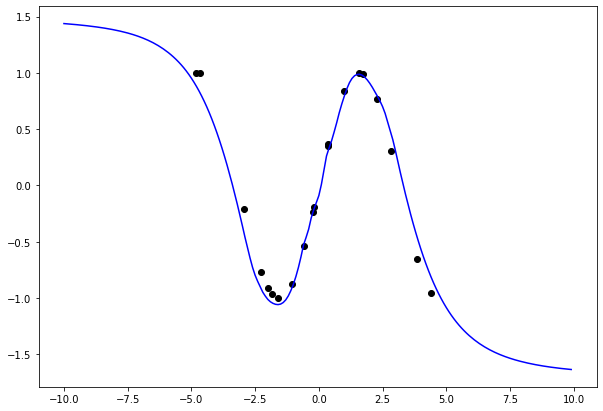

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(X_test,mean,c='blue')

lower_bound = mean - std * 0.5
upper_bound =  mean + std * 0.5
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

lower_bound = mean - std
upper_bound =  mean + std
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

lower_bound = mean - std * 2
upper_bound =  mean + std * 2
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

plt.scatter(X,y,c='black')